In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# set up
sales = pd.read_csv("C:/Users/ellie/Downloads/hk_sales_data.csv")
weather = pd.read_csv("C:/Users/ellie/Downloads/2024_weather_data.csv")

In [3]:
# process
sales = sales[sales['Void?'] == False]

weather = weather.drop(columns = ['description', 'sunrise', 'sunset', 'moonphase', 'snow', 'snowdepth','severerisk', 'name', 'conditions', 'icon', 'stations'])
sales = sales.drop(columns=['Void?'])

weather['date'] = pd.to_datetime(weather['datetime']).dt.date
sales['date'] = pd.to_datetime(sales['Sent Date']).dt.date
sales.drop(columns = ['Sent Date'])
weather.drop(columns = ['datetime'])

sales_weather = pd.merge(sales, weather, left_on='date', right_on='date', how='inner')
sales_weather['total_sale'] = sales_weather['Net Price'] * sales_weather['Qty']
sales_weather = sales_weather[sales_weather['total_sale'] >= 3]

In [4]:
daily_sales = sales_weather.groupby('date').agg(
    daily_sales=('total_sale', 'sum'),
).reset_index()
daily_sales = pd.merge(daily_sales, weather, left_on='date', right_on='date', how='inner').drop(columns = ['datetime'])

alc_sales = sales_weather[sales_weather['Menu'] == 'BEVERAGES']
alc_sales = alc_sales[alc_sales['Menu Group'] != 'NA Beverages']

daily_alc_sales = alc_sales.groupby('date').agg(
    daily_alc_sales=('total_sale', 'sum'),
).reset_index()

food_sales = sales_weather[sales_weather['Sales Category'] == 'Food']
daily_food_sales = food_sales.groupby('date').agg(
    daily_food_sales=('total_sale', 'sum'),
).reset_index()

total_sales = sales_weather.groupby('date').agg(
    total_sales=('total_sale', 'sum'),
).reset_index()

daily_sales = pd.merge(daily_alc_sales, daily_food_sales, on='date', how='outer')
daily_sales = pd.merge(daily_sales, total_sales, on='date', how='outer')
daily_sales['weekday'] = pd.to_datetime(daily_sales['date']).dt.weekday
daily_sales = pd.merge(daily_sales, weather, left_on='date', right_on='date', how='inner').drop(columns = ['datetime'])

In [5]:
train_set, test_set = train_test_split(da, test_size=0.2, random_state=42)
daily_sales = daily_sales[daily_sales['weekday'] == 5]
daily_sales = daily_sales.drop(columns = 'weekday')

In [6]:
# regression analysis
X = daily_sales[['feelslike', 'windspeed', 'uvindex']]
y = daily_sales['total_sales']

from sklearn.linear_model import SGDRegressor
mySGDModel = SGDRegressor()
mySGDModel.fit(X,y)
y_predict = mySGDModel.predict(X)
mse = mean_squared_error(y_test, y_predict)
mySGDModel_rmse = np.sqrt(mse)
output = ""
for f, t in zip(features, mySGDModel.coef_.flatten()):
  output += str(f) + ": " + str(t) + '\n'

r2_score = model.score(X_test, y_test)
print(f"R-squared: {r2_score:.2f}")

feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(feature_importance)

R-squared: 0.55
     Feature  Coefficient
0  feelslike   119.753510
1  windspeed   -47.122003
2    uvindex   319.211764


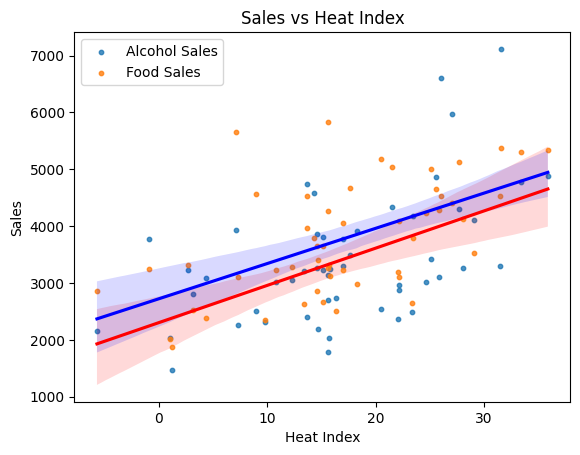

In [7]:
sns.regplot(x='feelslike', y='daily_alc_sales', data=daily_sales, 
            scatter_kws={'s': 10}, line_kws={'color': 'red'}, label='Alcohol Sales')

sns.regplot(x='feelslike', y='daily_food_sales', data=daily_sales,
            scatter_kws={'s': 10}, line_kws={'color': 'blue'}, label='Food Sales')
plt.xlabel('Heat Index')
plt.ylabel('Sales')
plt.title('Sales vs Heat Index')
plt.legend()
plt.show()

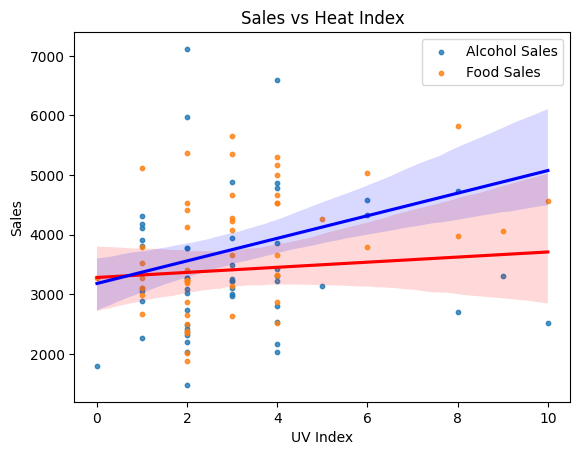

In [8]:
sns.regplot(x='uvindex', y='daily_alc_sales', data=daily_sales, 
            scatter_kws={'s': 10}, line_kws={'color': 'red'}, label='Alcohol Sales')

sns.regplot(x='uvindex', y='daily_food_sales', data=daily_sales,
            scatter_kws={'s': 10}, line_kws={'color': 'blue'}, label='Food Sales')
plt.xlabel('UV Index')
plt.ylabel('Sales')
plt.title('Sales vs Heat Index')
plt.legend()
plt.show()